## 회귀분석 코드입니다.

마지막 셀의 함수를 실행시킨뒤 원하는 국가, 수출입(택1), 카테고리, 처리단계, 가공단계 를 선택해주시면

2022년의 예측결과가 나옵니다.

## 주의사항

선택한 조건이 자료에 없을 수 있습니다.
에러가 나면 선택조건이 수출입 데이터에 없다는 뜻이므로 다른 선택지를 선택해 주세요.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np

data_files = os.listdir('./data2_csv')
korea_file = []

for file in data_files:
    if file == '.DS_Store':
        continue
    elif 'Korea__Republic_of' in file:
        korea_file.append(file)

In [6]:
korea_import_dic = dict()
korea_export_dic = dict()

for file in korea_file :
    if file == '.DS_Store':
        continue
    c1, c2 = file[49:].split('and')
    frist, second = c1[:-1], c2[1:-4]
    if frist == 'Korea__Republic_of':
        korea_import_dic[second] = file
    else:
        korea_export_dic[frist] = file
        
# len(korea_import_dic), len(korea_export_dic)
# korea_import_dic.keys() == korea_export_dic.keys()

korea_import_dic.keys()

dict_keys(['United_States_of_America', 'China', 'Viet_Nam', 'Singapore', 'Taipei__Chinese', 'Australia', 'Russian_Federation', 'Germany', 'Japan', 'Saudi_Arabia', 'India'])

Agriculture, forestry, fishing, food, beverages, tobacco : 농업, 임업, 어업, 식품, 음료, 담배

Construction, wood, glass, stone, basic metals, housing, electrical appliances, furniture : 건설, 목재, 유리, 석재, 기초 금속, 주택, 전기 제품, 가구

Government, military and other : 정부, 군대 및 기타

Health, pharmaceuticals, education, cultural, sport : 건강, 의약품, 교육, 문화, 스포츠

ICT, media, computers, business and financial services : ICT, 미디어, 컴퓨터, 비즈니스 및 금융 서비스

Mining, quarrying, refinery, fuels, chemicals, electricity, water, waste treatment : 광업, 채석, 정유, 연료, 화학 물질, 전기, 물, 폐기물 처리

Textile, apparel, shoes : 섬유, 의류, 신발

Transport equipment and services, travel, postal services : 운송 장비 및 서비스, 여행, 우편 서비스

국가번호를 입력해 주세요.(숫자만 입력후 엔터)
1. China
2. Viet_Nam
3. Singapore
4. Taipei__Chinese
5. Australia
6. Russian_Federation
7. Germany
8. Japan
9. United_States_of_America
10. Saudi_Arabia
11. India
1
수출 자료와 수입 자료중 하나를 선택해 번호를 입력해 주세요(숫자만 입력후 엔터)
1. 수입
2. 수출
1


<ipython-input-7-657b172f152a>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_import.loc[:, 'Product code'][:-1] = [int(x) for x in df_import.loc[:, 'Product code'][:-1]]
<ipython-input-7-657b172f152a>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_export.loc[:, 'Product code'][:-1] = [int(x) for x in df_export.loc[:, 'Product code'][:-1]]


원하시는 카테고리 번호를 선택해 주세요.(숫자만 입력))
1. Agriculture, forestry, fishing, food, beverages, tobacco : 농업, 임업, 어업, 식품, 음료, 담배
2. Construction, wood, glass, stone, basic metals, housing, electrical appliances, furniture : 건설, 목재, 유리, 석재, 기초 금속, 주택, 전기 제품, 가구
3. Government, military and other : 정부, 군대 및 기타
4. Health, pharmaceuticals, education, cultural, sport : 건강, 의약품, 교육, 문화, 스포츠
5. ICT, media, computers, business and financial services : ICT, 미디어, 컴퓨터, 비즈니스 및 금융 서비스
6. Mining, quarrying, refinery, fuels, chemicals, electricity, water, waste treatment : 광업, 채석, 정유, 연료, 화학 물질, 전기, 물, 폐기물 처리
7. Textile, apparel, shoes : 섬유, 의류, 신발
8. Transport equipment and services, travel, postal services : 운송 장비 및 서비스, 여행, 우편 서비스
5
원하시는 소비재를 선택해주세요.(숫자만 입력)
1. INT : 중간소비재
2. CONS : 최종소비재
2
원하시는 가공단계를 선택해주세요.(숫자만 입력)
1. PRIMARY : 1순위 처리
2. PROCESSED : 가공 완료
2


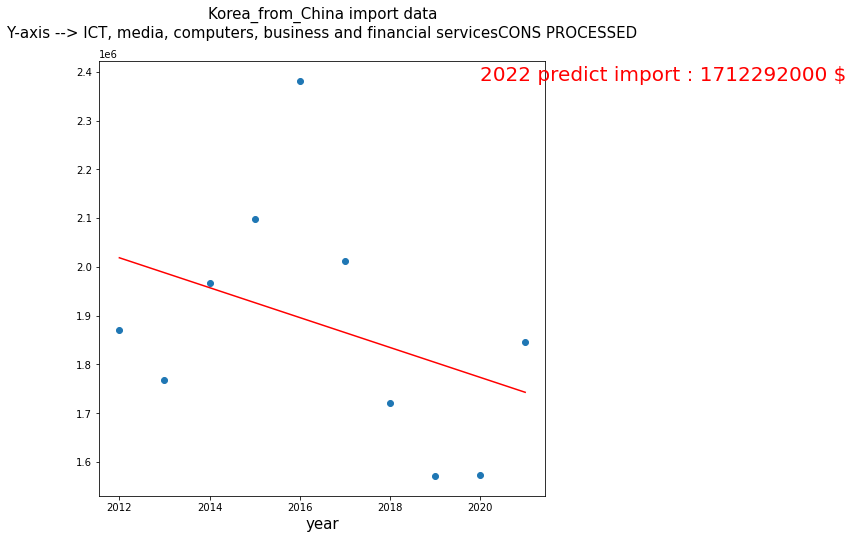

'2022 : 1712292000 $'

In [7]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

dic = {1 : 'Agriculture, forestry, fishing, food, beverages, tobacco ',
      2 : 'Construction, wood, glass, stone, basic metals, housing, electrical appliances, furniture ',
      3 : 'Government, military and other',
      4 : 'Health, pharmaceuticals, education, cultural, sport',
      5 : 'ICT, media, computers, business and financial services',
      6 : 'Mining, quarrying, refinery, fuels, chemicals, electricity, water, waste treatment ',
      7 : 'Textile, apparel, shoes ',
      8 : 'Transport equipment and services, travel, postal services',}

dic2 = {1 : 'INT ', 2 : 'CONS '}
dic3 = {1 : 'PRIMARY', 2 : 'PROCESSED'}

text = '원하시는 카테고리 번호를 선택해 주세요.(숫자만 입력))\n1. Agriculture, forestry, fishing, food, beverages, tobacco : 농업, 임업, 어업, 식품, 음료, 담배\n2. Construction, wood, glass, stone, basic metals, housing, electrical appliances, furniture : 건설, 목재, 유리, 석재, 기초 금속, 주택, 전기 제품, 가구\n3. Government, military and other : 정부, 군대 및 기타\n4. Health, pharmaceuticals, education, cultural, sport : 건강, 의약품, 교육, 문화, 스포츠\n5. ICT, media, computers, business and financial services : ICT, 미디어, 컴퓨터, 비즈니스 및 금융 서비스\n6. Mining, quarrying, refinery, fuels, chemicals, electricity, water, waste treatment : 광업, 채석, 정유, 연료, 화학 물질, 전기, 물, 폐기물 처리\n7. Textile, apparel, shoes : 섬유, 의류, 신발\n8. Transport equipment and services, travel, postal services : 운송 장비 및 서비스, 여행, 우편 서비스\n'
text2 = '원하시는 소비재를 선택해주세요.(숫자만 입력)\n1. INT : 중간소비재\n2. CONS : 최종소비재\n'
text3 = '원하시는 가공단계를 선택해주세요.(숫자만 입력)\n1. PRIMARY : 1순위 처리\n2. PROCESSED : 가공 완료\n'

def make_name(name_list):
    name = name_list[0] + name_list[1] + " " + name_list[2]
    return name

def make_DataFrame(dataframe):
    rows = []  
    for i in range(len(dataframe)):
        name_list = dataframe.iloc[i].name
        name = make_name(name_list)
        rows.append(name)

    column_name = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
    column = [[x for x in dataframe.iloc[i]] for i in range(len(dataframe))]
    df = pd.DataFrame(column, index = rows, columns = column_name)    
    return df

def LinearRegression_func(country_name, option):

    import_file = korea_import_dic[country_name]
    export_file = korea_export_dic[country_name]

    df_import = pd.read_csv('./data2_csv/' + import_file)
    df_export = pd.read_csv('./data2_csv/' + export_file)
    df_code = pd.read_excel('./data3/HS2012-17-BEC5 -- 08 Nov 2018.xlsx')
    
    
    df_import.loc[:, 'Product code'][:-1] = [int(x) for x in df_import.loc[:, 'Product code'][:-1]]
    df_export.loc[:, 'Product code'][:-1] = [int(x) for x in df_export.loc[:, 'Product code'][:-1]]


    ## colums 이름 바꿈
    df_import.columns = ['Product code', 'Product label', 'import_2012', 'import_2013', 'import_2014', 'import_2015', 'import_2016',
              'import_2017', 'import_2018',' import_2019', 'import_2020', 'import_2021',
             'exports_to_world', 'exports_to_world_2012', 'exports_to_world_2013', 'exports_to_world_2014',
              'exports_to_world_2015', 'exports_to_world_2016', 'exports_to_world_2017',
             'exports_to_world_2018', 'exports_to_world_2019', 'exports_to_world_2020', 'exports_to_world_2021',
             'imports_from_world', 'imports_from_world_2012', 'imports_from_world_2013', 'imports_from_world_2014',
             'imports_from_world_2015', 'imports_from_world_2016', 'imports_from_world_2017',
             'imports_from_world_2018', 'imports_from_world_2019', 'imports_from_world_2020', 'imports_from_world_2021']
    df_export.columns = ['Product code', 'Product label', 'import_2012', 'import_2013', 'import_2014', 'import_2015', 'import_2016',
             'import_2017', 'import_2018',' import_2019', 'import_2020', 'import_2021',
             'exports_to_world', 'exports_to_world_2012', 'exports_to_world_2013', 'exports_to_world_2014',
              'exports_to_world_2015', 'exports_to_world_2016', 'exports_to_world_2017',
             'exports_to_world_2018', 'exports_to_world_2019', 'exports_to_world_2020', 'exports_to_world_2021',
             'imports_from_world', 'imports_from_world_2012', 'imports_from_world_2013', 'imports_from_world_2014',
             'imports_from_world_2015', 'imports_from_world_2016', 'imports_from_world_2017',
             'imports_from_world_2018', 'imports_from_world_2019', 'imports_from_world_2020', 'imports_from_world_2021']


    data = df_code.loc[:, ['HS6', 'BEC5EndUse','BEC5Code1', 'BEC5Category', 'BEC5Processing']]
    data.columns = ['Product code','BEC5EndUse', 'BEC5Code1', 'BEC5Category', 'BEC5Processing']

    result1 = pd.merge(data, df_import, on='Product code')
    result2 = pd.merge(data, df_export, on='Product code')
    #result1['BEC5Processing'] = result1['BEC5Processing'].fillna("No")
    #result2['BEC5Processing'] = result1['BEC5Processing'].fillna("No")

    BEC5Category = set(result1['BEC5Category'])
    BEC5Processing = set(result1['BEC5Processing'])
    BEC5Code1 = set(result1['BEC5Code1'])
    
    import_df_korea = result1.loc[:, ['Product code','BEC5Code1','BEC5EndUse', 'BEC5Category', 'BEC5Processing', 'Product label','imports_from_world_2012', 'imports_from_world_2013', 'imports_from_world_2014',
             'imports_from_world_2015', 'imports_from_world_2016', 'imports_from_world_2017',
             'imports_from_world_2018', 'imports_from_world_2019', 'imports_from_world_2020', 'imports_from_world_2021']]
    export_df_korea = result1.loc[:, ['Product code','BEC5Code1','BEC5EndUse', 'BEC5Category', 'BEC5Processing', 'exports_to_world_2012', 'exports_to_world_2013', 'exports_to_world_2014',
              'exports_to_world_2015', 'exports_to_world_2016', 'exports_to_world_2017',
             'exports_to_world_2018', 'exports_to_world_2019', 'exports_to_world_2020', 'exports_to_world_2021']]

    export_df_korea2 = export_df_korea[(export_df_korea['BEC5EndUse'] == 'INT') | (export_df_korea['BEC5EndUse'] == 'CONS') | (export_df_korea['BEC5EndUse'] == 'CAPS')]
    export_group_df = export_df_korea2.groupby(['BEC5Category','BEC5EndUse', 'BEC5Processing']).sum()
    export_group_df = export_group_df.drop('BEC5Code1', axis=1) 


    import_df_korea2 = import_df_korea[(import_df_korea['BEC5EndUse'] == 'INT') | (import_df_korea['BEC5EndUse'] == 'CONS') | (import_df_korea['BEC5EndUse'] == 'CAPS')]
    import_group_df = import_df_korea2.groupby(['BEC5Category','BEC5EndUse', 'BEC5Processing']).sum()
    import_group_df = import_group_df.drop('BEC5Code1', axis=1) 
    
    df = make_DataFrame(export_group_df) if option == 'export' else make_DataFrame(import_group_df)
    
    
    name = ''
    while name not in df.index:
        BEC5Category_Select = int(input(text))
        BEC5EndUse_Select = int(input(text2))
        BEC5Processing_Select = int(input(text3))
        name = dic[BEC5Category_Select] + dic2[BEC5EndUse_Select] + dic3[BEC5Processing_Select]
        
    X = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
    y = list(df.loc[name].values)
    
    dataFrame = pd.DataFrame({'name' : X, "year" : y})

    ## states model 사용
    fit = ols('year ~ name',data=dataFrame).fit() ## 단순선형회귀모형 적합
    result = fit.predict(exog=dict(name=[2022]))
    
    ## 시각화
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
 
    font_size = 15
    plt.scatter(dataFrame['name'],dataFrame['year']) ## 원 데이터 산포도
    plt.plot(dataFrame['name'],fit.fittedvalues,color='red') ## 회귀직선 추가
 
    plt.xlabel('year', fontsize=font_size)
    plt.text(2020, max(y), '2022 predict ' + option + ' : ' + str(int(result) * 1000) + ' $',
            fontsize = 20, color = 'red')
    
    
    plt.title('Korea_from_' + country_name + ' ' + option + ' data\n' + 'Y-axis --> '+ name + '\n',fontsize=font_size)
    plt.show()
    return '2022 : ' + str(int(result) * 1000) + ' $'

country_text = '국가번호를 입력해 주세요.(숫자만 입력후 엔터)\n1. China\n2. Viet_Nam\n3. Singapore\n4. Taipei__Chinese\n5. Australia\n6. Russian_Federation\n7. Germany\n8. Japan\n9. United_States_of_America\n10. Saudi_Arabia\n11. India\n'
country_dic = {0 : 'korea', 1 : 'China', 2 : 'Viet_Nam', 3 : 'Singapore', 4 : 'Taipei__Chinese', 5 : 'Australia', 6 : 'Russian_Federation', 7 : 'Germany', 8 : 'Japan', 9 : 'United_States_of_America', 10 : 'Saudi_Arabia', 11 : 'India' }
country_name = ''
country_num = 0

while country_dic[country_num] not in korea_import_dic.keys():
    country_num = int(input(country_text))
    country_name = country_dic[country_num]

number = 0
while number != 1 and number != 2:
    number = int(input('수출 자료와 수입 자료중 하나를 선택해 번호를 입력해 주세요(숫자만 입력후 엔터)\n1. 수입\n2. 수출\n'))
    if number == 1:
        option = 'import'
    elif number == 2:
        option = 'export'
        
LinearRegression_func(country_name, option)
